Pharma Medicine Data Analysis

Objective -  To analyze and derive insights from a dataset of pharmaceutical medicines with a focus on understanding which treatment has most habit forming outcome and combinations of therapeutic, chemical, and action classes to identify the most common and impactful combinations that are associated with habit-forming drugs.
Investigate the medicines that fall under these combinations and their associated substitutes.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df = pd.read_csv(r"C:\Users\Ishwari Kadam\Desktop\Projects\Pharma Medicine Usage data analysis\medicine_dataset.csv")

C:\Users\Ishwari Kadam\AppData\Local\Temp\ipykernel_17396\2536834314.py:1: DtypeWarning: Columns (42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Ishwari Kadam\Desktop\Projects\Pharma Medicine Usage data analysis\medicine_dataset.csv")


In [3]:
df

,id,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,...,sideEffect41,use0,use1,use2,use3,use4,Chemical Class,Habit Forming,Therapeutic Class,Action Class
0,1,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Moxiforce-CV 625 Tablet,Fightox 625 Tablet,Novamox CV 625mg Tablet,Vomiting,Nausea,Diarrhea,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,NaN,No,ANTI INFECTIVES,NaN
1,2,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides
2,3,ascoril ls syrup,Solvin LS Syrup,Ambrodil-LX Syrup,Zerotuss XP Syrup,Capex LS Syrup,Broxum LS Syrup,Nausea,Vomiting,Diarrhea,...,NaN,Treatment of Cough with mucus,NaN,NaN,NaN,NaN,NaN,No,RESPIRATORY,NaN
3,4,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,...,NaN,Treatment of Sneezing and runny nose due to al...,Treatment of Allergic conditions,NaN,NaN,NaN,Diphenylmethane Derivative,No,RESPIRATORY,H1 Antihistaminics (second Generation)
4,5,avil 25 tablet,Eralet 25mg Tablet,NaN,NaN,NaN,NaN,Sleepiness,Dryness in mouth,NaN,...,NaN,Treatment of Allergic conditions,NaN,NaN,NaN,NaN,Pyridines Derivatives,No,RESPIRATORY,H1 Antihistaminics (First Generation)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248213,248214,zestrain 100mg/325mg/250mg tablet mr,Aclotec MR 100mg/325mg/250mg Tablet,SAMONEC MR TABLET,Uniclof 100mg/325mg/250mg Tablet MR,Macito 100mg/325mg/250mg Tablet MR,Rumatin 100mg/325mg/250mg Tablet MR,Nausea,Vomiting,Heartburn,...,NaN,Treatment of Muscular pain,NaN,NaN,NaN,NaN,NaN,No,PAIN ANALGESICS,NaN
248214,248215,zoxinace 200mg tablet sr,Algic 200mg Tablet SR,Topnac 200mg Tablet SR,Kindac 200mg Tablet SR,Ultranac 200mg Tablet SR,Bignac 200mg Tablet SR,Dizziness,Indigestion,Nausea,...,NaN,Pain relief,NaN,NaN,NaN,NaN,Dichlorobenzenes Derivative,No,PAIN ANALGESICS,NSAID's- Non-Selective COX 1&2 Inhibitors (ace...
248215,248216,zivex 25mg tablet,HD Zine 25mg Tablet,Hydrocas 25mg Tablet,Hyzox 25 Tablet,Hydil 25mg Tablet,Zyzine 25mg Tablet,Sedation,Nausea,Vomiting,...,NaN,Treatment of Anxiety,Treatment of Skin conditions with inflammation...,NaN,NaN,NaN,Piperazine Derivative,No,RESPIRATORY,H1 Antihistaminics (First Generation)
248216,248217,zi fast 500mg injection,Zycin 500mg Injection,Aziwok 500mg Injection,Azirow 500mg Injection,Toracin 500mg Injection,Azymed 500mg Injection,"Injection site reactions (pain, swelling, redn...",Vomiting,Nausea,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248218 entries, 0 to 248217
Data columns (total 58 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 248218 non-null  int64 
 1   name               248218 non-null  object
 2   substitute0        238621 non-null  object
 3   substitute1        233867 non-null  object
 4   substitute2        230233 non-null  object
 5   substitute3        226856 non-null  object
 6   substitute4        223962 non-null  object
 7   sideEffect0        248218 non-null  object
 8   sideEffect1        238416 non-null  object
 9   sideEffect2        229500 non-null  object
 10  sideEffect3        207638 non-null  object
 11  sideEffect4        163560 non-null  object
 12  sideEffect5        131258 non-null  object
 13  sideEffect6        91857 non-null   object
 14  sideEffect7        67750 non-null   object
 15  sideEffect8        48506 non-null   object
 16  sideEffect9        3

<Axes: >

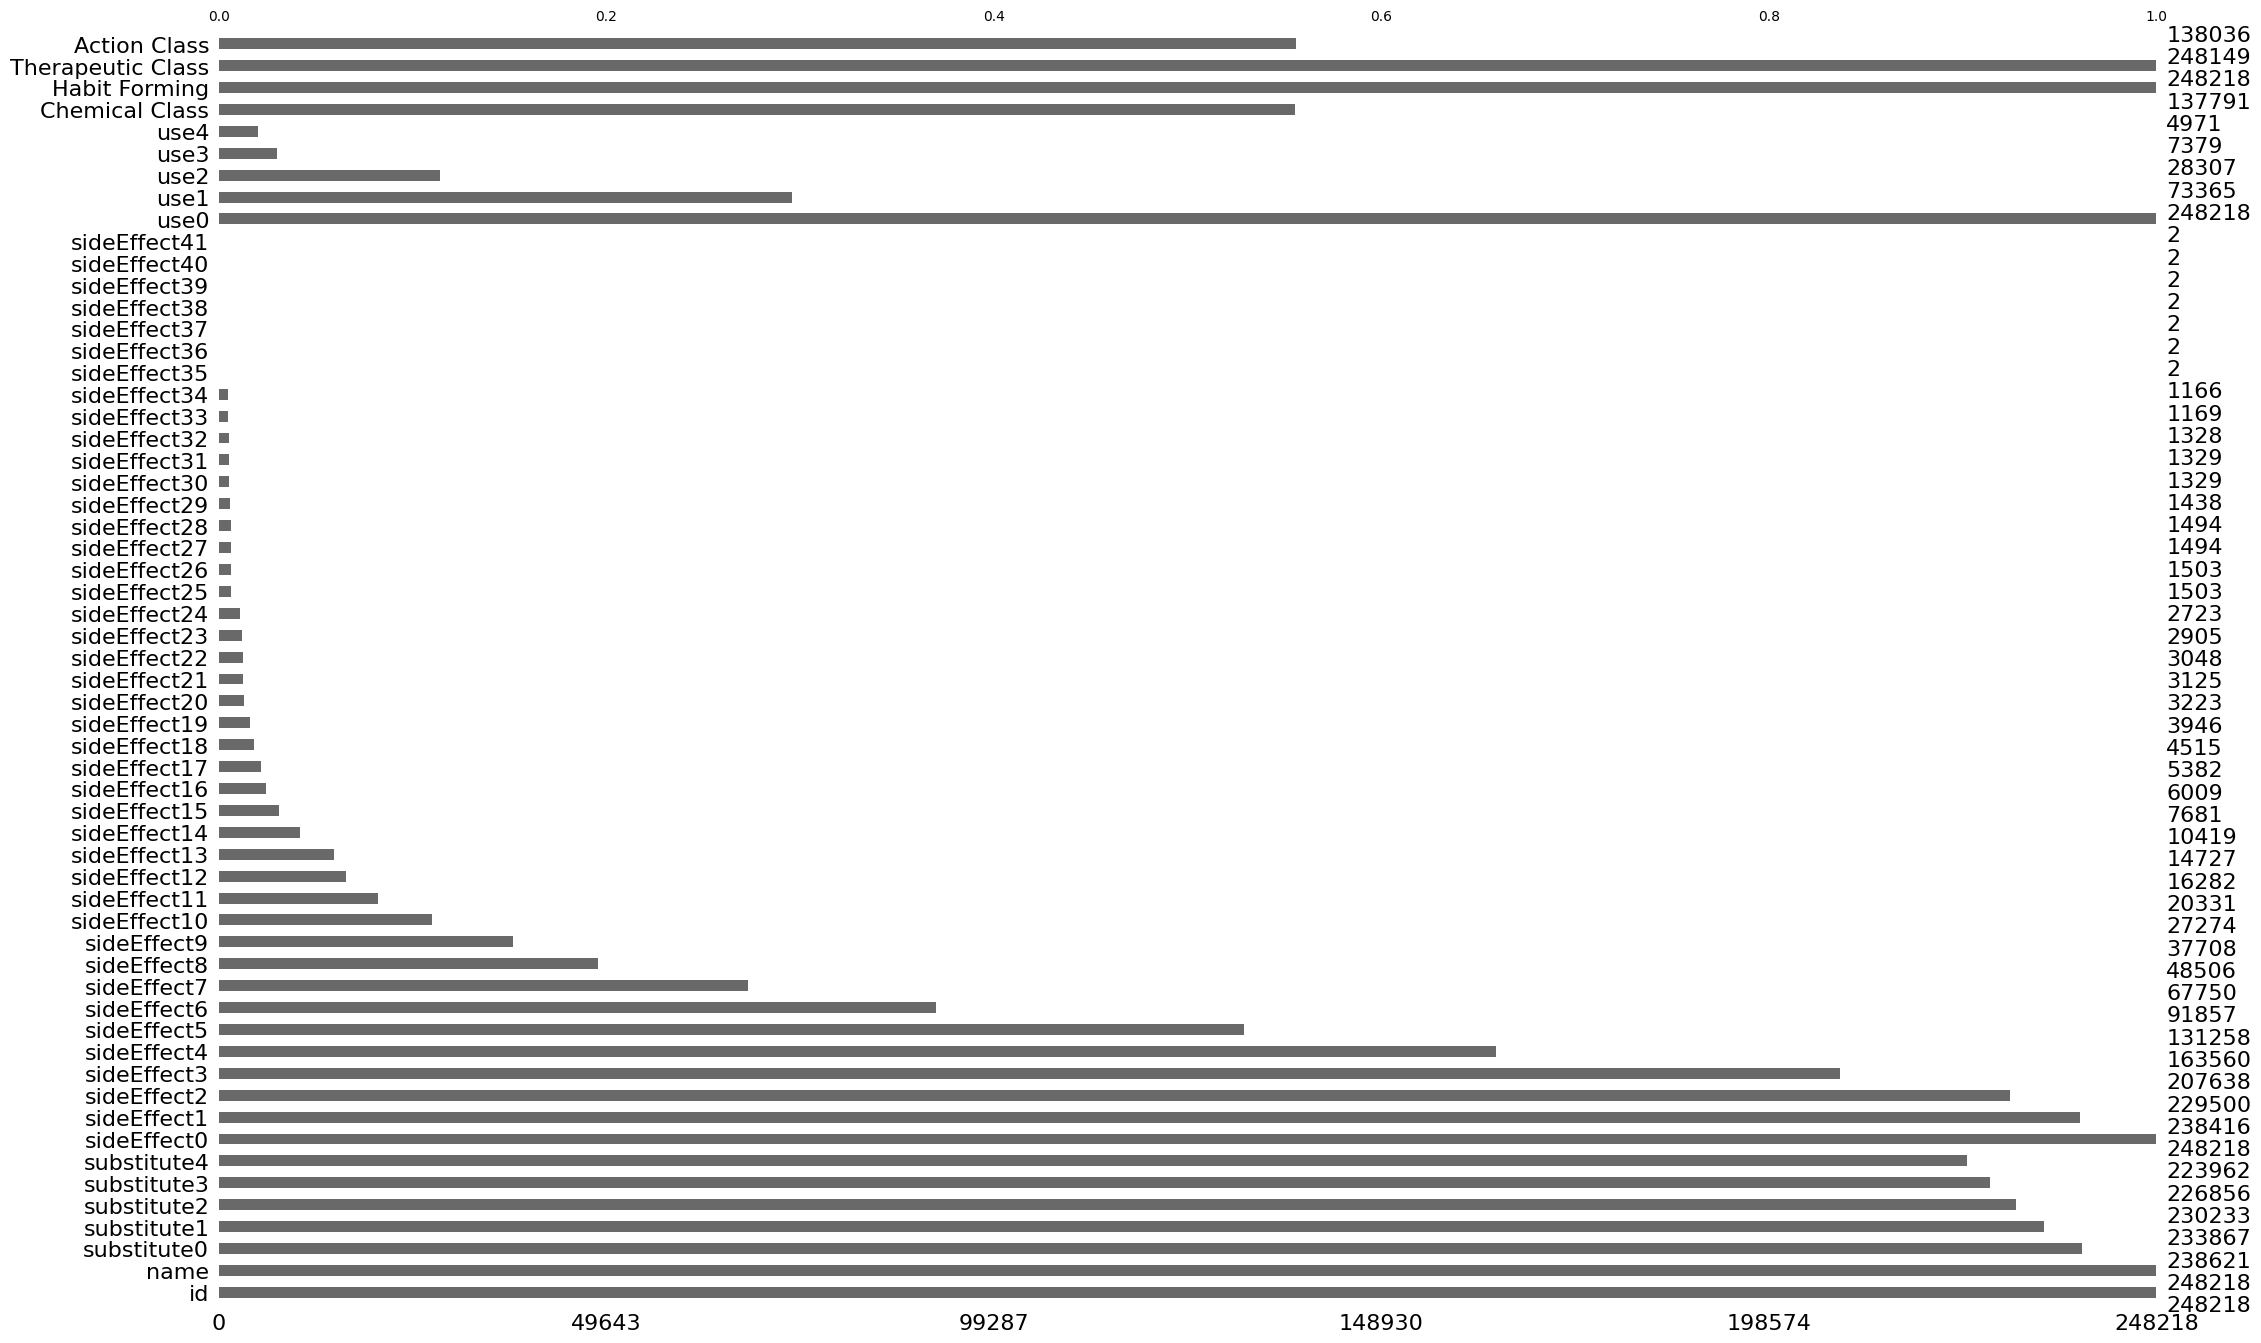

In [5]:
# check missing values using missingno
msno.bar(df)

In [6]:
#Calculate the 5% values of dataset
threshold= len(df)* 0.5
print(threshold)

124109.0


In the dataset, there are too many missing values. For proper analysis, we need to take care of unclear information.
Hence, we will try to delete rows where chemical and action class are null as they are the important features for analysis and cant have many missing values.

In [9]:
df = df.dropna(subset=['Chemical Class', 'Action Class', 'Therapeutic Class'], how='any')

In [10]:
df.reset_index()

,index,id,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,...,sideEffect41,use0,use1,use2,use3,use4,Chemical Class,Habit Forming,Therapeutic Class,Action Class
0,1,2,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides
1,3,4,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,...,NaN,Treatment of Sneezing and runny nose due to al...,Treatment of Allergic conditions,NaN,NaN,NaN,Diphenylmethane Derivative,No,RESPIRATORY,H1 Antihistaminics (second Generation)
2,4,5,avil 25 tablet,Eralet 25mg Tablet,NaN,NaN,NaN,NaN,Sleepiness,Dryness in mouth,...,NaN,Treatment of Allergic conditions,NaN,NaN,NaN,NaN,Pyridines Derivatives,No,RESPIRATORY,H1 Antihistaminics (First Generation)
3,7,8,azee 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides
4,8,9,atarax 25mg tablet,HD Zine 25mg Tablet,Hyzox 25 Tablet,Hizet 25mg Tablet,Hydil 25mg Tablet,Zyzine 25mg Tablet,Sedation,Nausea,...,NaN,Treatment of Anxiety,Treatment of Skin conditions with inflammation...,NaN,NaN,NaN,Piperazine Derivative,No,RESPIRATORY,H1 Antihistaminics (First Generation)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137598,248212,248213,zemhart 30mg tablet,Dilzex 30mg Tablet,Diltiaz 30mg Tablet,Triazem 30mg Tablet,Dilti 30mg Tablet,DZ 30mg Tablet,Headache,Constipation,...,NaN,Treatment of Hypertension (high blood pressure),Treatment of Angina (heart-related chest pain),Treatment of Arrhythmia,NaN,NaN,Benzothiazepine derivative,No,CARDIAC,Calcium channel blockers- Nondihydropyridines
137599,248214,248215,zoxinace 200mg tablet sr,Algic 200mg Tablet SR,Topnac 200mg Tablet SR,Kindac 200mg Tablet SR,Ultranac 200mg Tablet SR,Bignac 200mg Tablet SR,Dizziness,Indigestion,...,NaN,Pain relief,NaN,NaN,NaN,NaN,Dichlorobenzenes Derivative,No,PAIN ANALGESICS,NSAID's- Non-Selective COX 1&2 Inhibitors (ace...
137600,248215,248216,zivex 25mg tablet,HD Zine 25mg Tablet,Hydrocas 25mg Tablet,Hyzox 25 Tablet,Hydil 25mg Tablet,Zyzine 25mg Tablet,Sedation,Nausea,...,NaN,Treatment of Anxiety,Treatment of Skin conditions with inflammation...,NaN,NaN,NaN,Piperazine Derivative,No,RESPIRATORY,H1 Antihistaminics (First Generation)
137601,248216,248217,zi fast 500mg injection,Zycin 500mg Injection,Aziwok 500mg Injection,Azirow 500mg Injection,Toracin 500mg Injection,Azymed 500mg Injection,"Injection site reactions (pain, swelling, redn...",Vomiting,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides


Now, in the remaining dataset, we will try to drop columns in which there are more than or equal to 5% missing values

In [11]:
#Calculate the 5% values of dataset
threshold= len(df)* 0.5
print(threshold)

68801.5


In [12]:
#Cols that have more than or equal with 5% missing values
cols_drop= df.columns[df.isna().sum()>= threshold]
print(cols_drop)

Index(['sideEffect5', 'sideEffect6', 'sideEffect7', 'sideEffect8',
       'sideEffect9', 'sideEffect10', 'sideEffect11', 'sideEffect12',
       'sideEffect13', 'sideEffect14', 'sideEffect15', 'sideEffect16',
       'sideEffect17', 'sideEffect18', 'sideEffect19', 'sideEffect20',
       'sideEffect21', 'sideEffect22', 'sideEffect23', 'sideEffect24',
       'sideEffect25', 'sideEffect26', 'sideEffect27', 'sideEffect28',
       'sideEffect29', 'sideEffect30', 'sideEffect31', 'sideEffect32',
       'sideEffect33', 'sideEffect34', 'sideEffect35', 'sideEffect36',
       'sideEffect37', 'sideEffect38', 'sideEffect39', 'sideEffect40',
       'sideEffect41', 'use1', 'use2', 'use3', 'use4'],
      dtype='object')


In [13]:
#Cols that have less than 5% missing value
cols_rem= df.columns[df.isna().sum() < threshold]
print(cols_rem)

Index(['id', 'name', 'substitute0', 'substitute1', 'substitute2',
       'substitute3', 'substitute4', 'sideEffect0', 'sideEffect1',
       'sideEffect2', 'sideEffect3', 'sideEffect4', 'use0', 'Chemical Class',
       'Habit Forming', 'Therapeutic Class', 'Action Class'],
      dtype='object')


In [14]:
df.drop(columns = cols_drop, inplace = True)

In [15]:
df.rename(columns = {'use0' : 'Treatment'}, inplace = True)
df.rename(columns = {'name' : 'Medicine'}, inplace = True)

In [18]:
# Move 'Habit Forming' column to the end
df = df[[col for col in df.columns if col != 'Habit Forming'] + ['Habit Forming']]

In [19]:
df

,id,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,sideEffect3,sideEffect4,Treatment,Chemical Class,Therapeutic Class,Action Class,Habit Forming
1,2,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,Diarrhea,NaN,Treatment of Bacterial infections,Macrolides,ANTI INFECTIVES,Macrolides,No
3,4,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,Nausea,NaN,Treatment of Sneezing and runny nose due to al...,Diphenylmethane Derivative,RESPIRATORY,H1 Antihistaminics (second Generation),No
4,5,avil 25 tablet,Eralet 25mg Tablet,NaN,NaN,NaN,NaN,Sleepiness,Dryness in mouth,NaN,NaN,NaN,Treatment of Allergic conditions,Pyridines Derivatives,RESPIRATORY,H1 Antihistaminics (First Generation),No
7,8,azee 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,Diarrhea,NaN,Treatment of Bacterial infections,Macrolides,ANTI INFECTIVES,Macrolides,No
8,9,atarax 25mg tablet,HD Zine 25mg Tablet,Hyzox 25 Tablet,Hizet 25mg Tablet,Hydil 25mg Tablet,Zyzine 25mg Tablet,Sedation,Nausea,Vomiting,Upset stomach,Constipation,Treatment of Anxiety,Piperazine Derivative,RESPIRATORY,H1 Antihistaminics (First Generation),No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248212,248213,zemhart 30mg tablet,Dilzex 30mg Tablet,Diltiaz 30mg Tablet,Triazem 30mg Tablet,Dilti 30mg Tablet,DZ 30mg Tablet,Headache,Constipation,Dizziness,Fatigue,"Flushing (sense of warmth in the face, ears, n...",Treatment of Hypertension (high blood pressure),Benzothiazepine derivative,CARDIAC,Calcium channel blockers- Nondihydropyridines,No
248214,248215,zoxinace 200mg tablet sr,Algic 200mg Tablet SR,Topnac 200mg Tablet SR,Kindac 200mg Tablet SR,Ultranac 200mg Tablet SR,Bignac 200mg Tablet SR,Dizziness,Indigestion,Nausea,Abdominal pain,Increased liver enzymes,Pain relief,Dichlorobenzenes Derivative,PAIN ANALGESICS,NSAID's- Non-Selective COX 1&2 Inhibitors (ace...,No
248215,248216,zivex 25mg tablet,HD Zine 25mg Tablet,Hydrocas 25mg Tablet,Hyzox 25 Tablet,Hydil 25mg Tablet,Zyzine 25mg Tablet,Sedation,Nausea,Vomiting,Upset stomach,Constipation,Treatment of Anxiety,Piperazine Derivative,RESPIRATORY,H1 Antihistaminics (First Generation),No
248216,248217,zi fast 500mg injection,Zycin 500mg Injection,Aziwok 500mg Injection,Azirow 500mg Injection,Toracin 500mg Injection,Azymed 500mg Injection,"Injection site reactions (pain, swelling, redn...",Vomiting,Nausea,Abdominal pain,Diarrhea,Treatment of Bacterial infections,Macrolides,ANTI INFECTIVES,Macrolides,No


In [20]:
# Check count of unique values in each column
nunique_values = {col: df[col].nunique() for col in df.columns}

# Display unique values
for column, values in nunique_values.items():
    print(f"Column '{column}': {values}")

Column 'id': 137603
Column 'name': 123152
Column 'substitute0': 10376
Column 'substitute1': 8969
Column 'substitute2': 7896
Column 'substitute3': 7163
Column 'substitute4': 6593
Column 'sideEffect0': 278
Column 'sideEffect1': 271
Column 'sideEffect2': 287
Column 'sideEffect3': 288
Column 'sideEffect4': 261
Column 'Treatment': 485
Column 'Chemical Class': 838
Column 'Therapeutic Class': 22
Column 'Action Class': 426
Column 'Habit Forming': 2


In [21]:
# Exclude 'id' and 'name' columns
excluded_columns = ['id', 'name']
columns_to_count = [col for col in df.columns if col not in excluded_columns]

# Get value counts for remaining columns
value_counts = {col: df[col].value_counts() for col in columns_to_count}

# Display value counts
for column, counts in value_counts.items():
    print(f"Value counts for column '{column}':")
    print(counts)
    print("===============")

Value counts for column 'substitute0':
substitute0
Oflotas 200mg Tablet            1658
Azicip 250 Tablet               1652
Azax 500 Tablet                 1233
Zefcort 6 Tablet                1213
Cefoxim 500 Tablet              1171
                                ... 
DavaIndia Ginkgo 40mg Tablet       1
Micogen Injection                  1
Zoladex 3.6 Injection              1
Gabanyl 300 Capsule                1
Tamicort 40 mg Injection           1
Name: count, Length: 10376, dtype: int64
Value counts for column 'substitute1':
substitute1
Olox 200mg Tablet            1657
Azikem 250mg Tablet          1586
Zady 500 Tablet              1235
Zefu 500 Tablet              1170
Zipod 200mg Tablet           1154
                             ... 
Relitil 25mg/ml Injection       1
Minokem 5% Spray                1
Cevadil 200mg Capsule           1
Milipran 50mg Tablet            1
Zencef 500mg Injection          1
Name: count, Length: 8969, dtype: int64
Value counts for column 'substitute2

In [22]:
# Replace 'bacterial infection' with 'treatment of bacterial infection' in the 'use0' column
df['Treatment'] = df['Treatment'].replace(' Bacterial infections', 'Treatment of Bacterial infections')

In [23]:
df.columns

Index(['id', 'name', 'substitute0', 'substitute1', 'substitute2',
       'substitute3', 'substitute4', 'sideEffect0', 'sideEffect1',
       'sideEffect2', 'sideEffect3', 'sideEffect4', 'Treatment',
       'Chemical Class', 'Therapeutic Class', 'Action Class', 'Habit Forming'],
      dtype='object')

In [72]:
columns_to_analyze = ['name', 'sideEffect0', 'Treatment', 'Chemical Class','Therapeutic Class', 'Action Class']

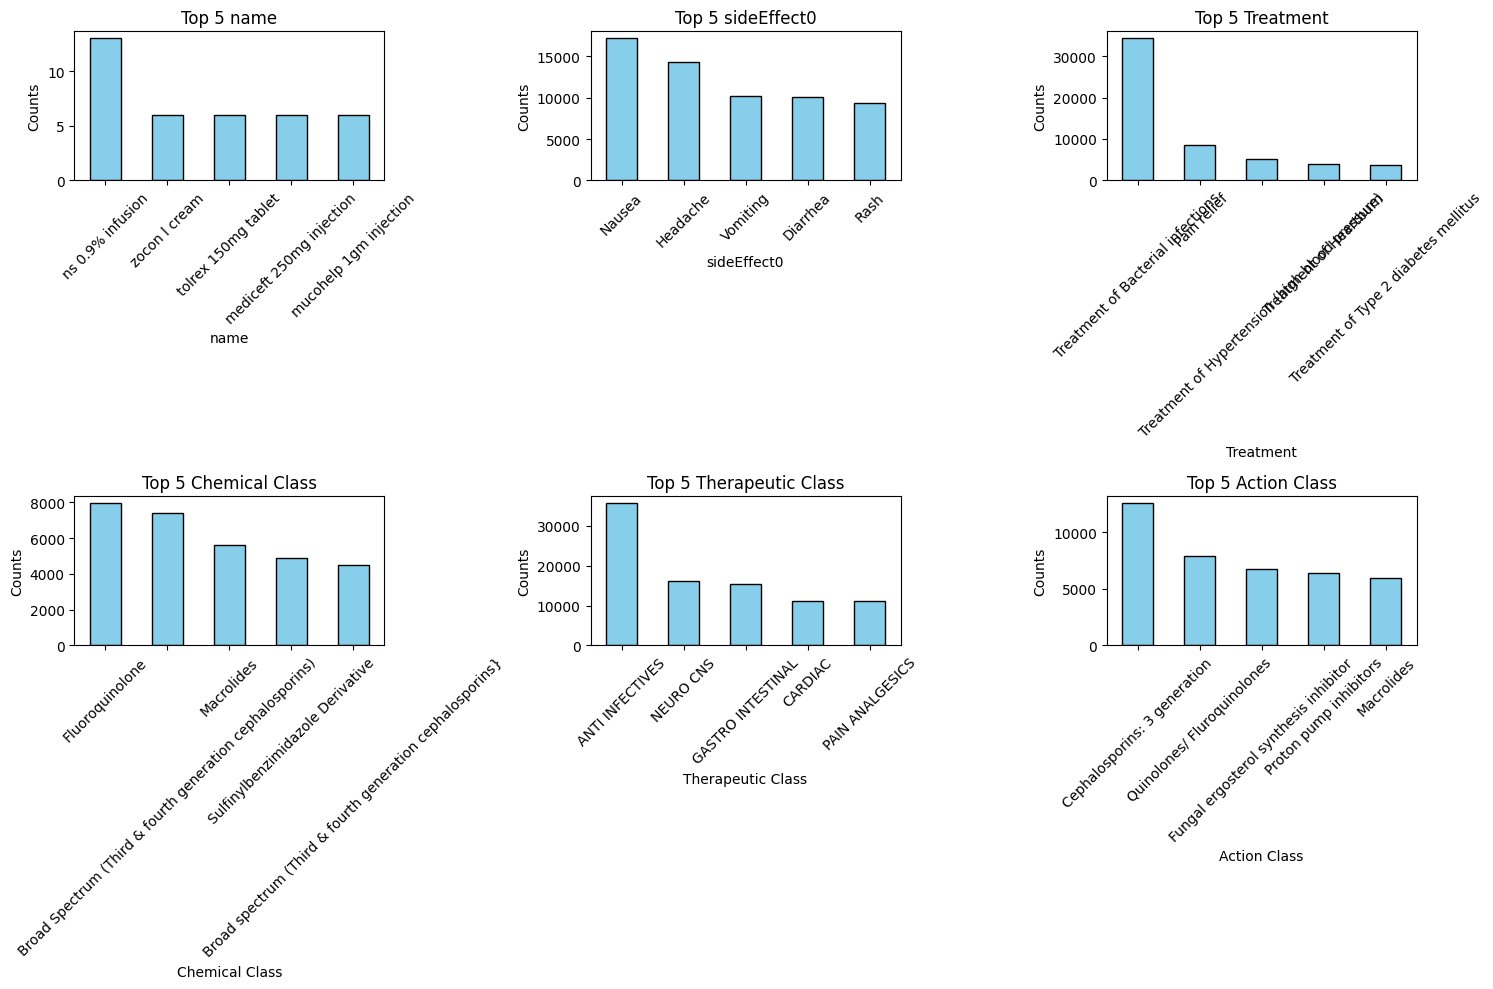

In [73]:
# Create subplots with a grid of 3 columns and 2 rows
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust size for readability
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each column in a separate subplot
for idx, col in enumerate(columns_to_analyze):
    top_values = df[col].value_counts().head(5)  # Get top 5 value counts
    ax = axes[idx]
    top_values.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f"Top 5 {col}", fontsize=12)
    ax.set_ylabel("Counts", fontsize=10)
    ax.set_xlabel(col, fontsize=10)
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for idx in range(len(columns_to_analyze), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

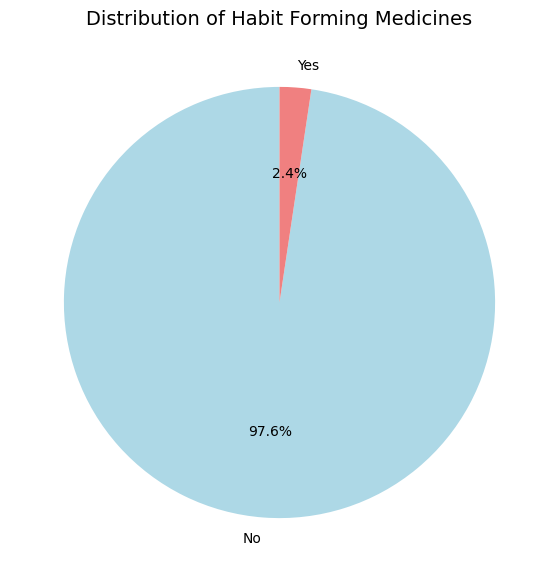

In [76]:
# Get the value counts for the 'Habit Forming' column
habit_forming_counts = df['Habit Forming'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))
habit_forming_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Habit Forming Medicines', fontsize=14)
plt.ylabel('')  # Remove the ylabel for cleaner presentation
plt.show()

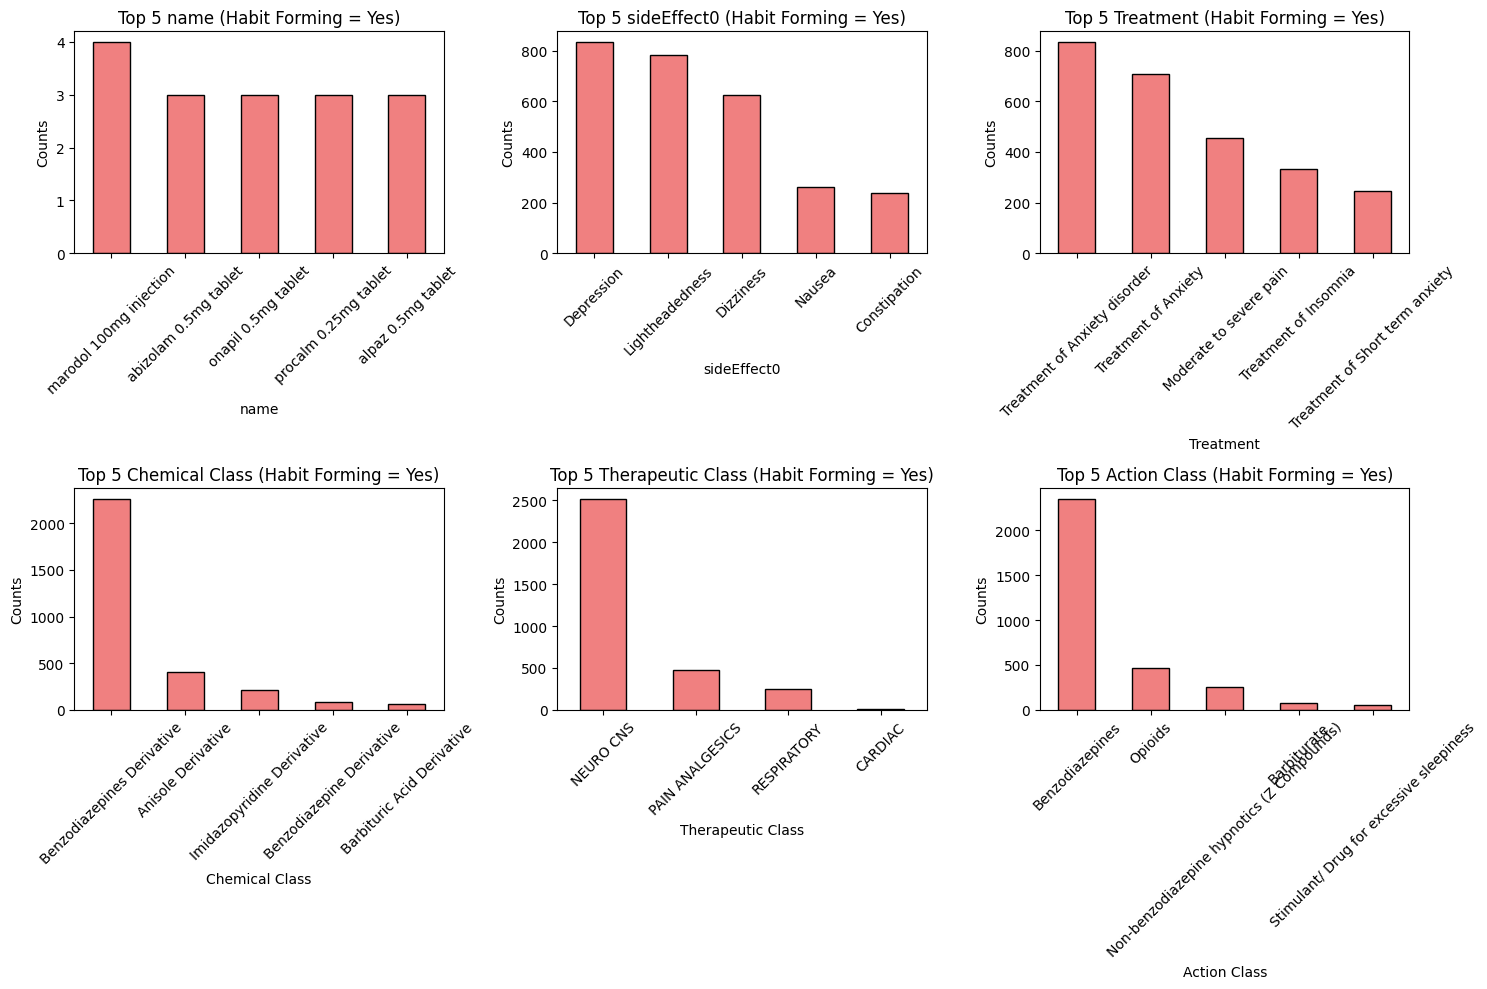

In [74]:
# Filter the dataset for Habit Forming = Yes
habit_forming_yes = df[df['Habit Forming'] == "Yes"]

# Create subplots with a grid of 3 columns and 2 rows
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust size for readability
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each column in a separate subplot
for idx, col in enumerate(columns_to_analyze):
    top_values = habit_forming_yes[col].value_counts().head(5)  # Get top 5 value counts
    ax = axes[idx]
    top_values.plot(kind='bar', ax=ax, color='lightcoral', edgecolor='black')
    ax.set_title(f"Top 5 {col} (Habit Forming = Yes)", fontsize=12)
    ax.set_ylabel("Counts", fontsize=10)
    ax.set_xlabel(col, fontsize=10)
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for idx in range(len(columns_to_analyze), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [75]:
# Filter the data for habit-forming medicines
habit_forming_yes = df[df['Habit Forming'] == 'Yes']

# Get the value counts for the 'Treatment' column for habit-forming medicines
treatment_value_counts = habit_forming_yes['Treatment'].value_counts()

# Display the result
print("Treatment Value Counts for Habit Forming Medicines:\n")
print(treatment_value_counts)

Treatment Value Counts for Habit Forming Medicines:

Treatment
Treatment of Anxiety disorder                                      834
Treatment of Anxiety                                               707
 Moderate to severe pain                                           454
Treatment of Insomnia                                              331
Treatment of Short term anxiety                                    246
Treatment of Epilepsy/Seizures                                     223
 Severe anxiety                                                     77
 Short term anxiety                                                 76
 Epilepsy/Seizures                                                  68
 Narcolepsy (Uncontrollable daytime sleepiness)                     50
 Conscious sedation during diagnostic or therapeutic procedures     38
 Insomnia                                                           36
Treatment of Status epilepticus                                     23
Treatment of M

In [29]:
df

,id,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,sideEffect3,sideEffect4,Treatment,Chemical Class,Therapeutic Class,Action Class,Habit Forming
1,2,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,Diarrhea,NaN,Treatment of Bacterial infections,Macrolides,ANTI INFECTIVES,Macrolides,No
3,4,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,Nausea,NaN,Treatment of Sneezing and runny nose due to al...,Diphenylmethane Derivative,RESPIRATORY,H1 Antihistaminics (second Generation),No
4,5,avil 25 tablet,Eralet 25mg Tablet,NaN,NaN,NaN,NaN,Sleepiness,Dryness in mouth,NaN,NaN,NaN,Treatment of Allergic conditions,Pyridines Derivatives,RESPIRATORY,H1 Antihistaminics (First Generation),No
7,8,azee 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,Diarrhea,NaN,Treatment of Bacterial infections,Macrolides,ANTI INFECTIVES,Macrolides,No
8,9,atarax 25mg tablet,HD Zine 25mg Tablet,Hyzox 25 Tablet,Hizet 25mg Tablet,Hydil 25mg Tablet,Zyzine 25mg Tablet,Sedation,Nausea,Vomiting,Upset stomach,Constipation,Treatment of Anxiety,Piperazine Derivative,RESPIRATORY,H1 Antihistaminics (First Generation),No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248212,248213,zemhart 30mg tablet,Dilzex 30mg Tablet,Diltiaz 30mg Tablet,Triazem 30mg Tablet,Dilti 30mg Tablet,DZ 30mg Tablet,Headache,Constipation,Dizziness,Fatigue,"Flushing (sense of warmth in the face, ears, n...",Treatment of Hypertension (high blood pressure),Benzothiazepine derivative,CARDIAC,Calcium channel blockers- Nondihydropyridines,No
248214,248215,zoxinace 200mg tablet sr,Algic 200mg Tablet SR,Topnac 200mg Tablet SR,Kindac 200mg Tablet SR,Ultranac 200mg Tablet SR,Bignac 200mg Tablet SR,Dizziness,Indigestion,Nausea,Abdominal pain,Increased liver enzymes,Pain relief,Dichlorobenzenes Derivative,PAIN ANALGESICS,NSAID's- Non-Selective COX 1&2 Inhibitors (ace...,No
248215,248216,zivex 25mg tablet,HD Zine 25mg Tablet,Hydrocas 25mg Tablet,Hyzox 25 Tablet,Hydil 25mg Tablet,Zyzine 25mg Tablet,Sedation,Nausea,Vomiting,Upset stomach,Constipation,Treatment of Anxiety,Piperazine Derivative,RESPIRATORY,H1 Antihistaminics (First Generation),No
248216,248217,zi fast 500mg injection,Zycin 500mg Injection,Aziwok 500mg Injection,Azirow 500mg Injection,Toracin 500mg Injection,Azymed 500mg Injection,"Injection site reactions (pain, swelling, redn...",Vomiting,Nausea,Abdominal pain,Diarrhea,Treatment of Bacterial infections,Macrolides,ANTI INFECTIVES,Macrolides,No


In [31]:
from scipy.stats import chi2_contingency

# Define the categorical columns to analyze
categorical_columns = ['Chemical Class', 'Therapeutic Class', 'Action Class', 'Treatment']

# Loop through each categorical variable
for col in categorical_columns:
    print(f"Analyzing: {col}")
    
    # Create a contingency table
    contingency_table = pd.crosstab(df[col], df['Habit Forming'])
    print("\nContingency Table:")
    print(contingency_table)
    
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-Square Test Results for {col}:")
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    
    # Check significance
    if p < 0.05:
        print(f"Conclusion: Significant relationship between {col} and Habit Forming (p < 0.05)\n")
    else:
        print(f"Conclusion: No significant relationship between {col} and Habit Forming (p >= 0.05)\n")


Analyzing: Chemical Class

Contingency Table:
Habit Forming                    No  Yes
Chemical Class                          
1,2-Aminoalcohols                95    0
1,3-Diarylpropanoid Derivative  181    0
1,3-Diarylpropanoid derivative    1    0
1-Benzopyrans derivative        165    0
1-Benzothiophenes Derivative      1    0
...                             ...  ...
Xanthine Derivative              12    0
Xanthine derivatives              4    0
Xanthines Derivative             36    0
Xanthinic Derivatives           451    0
Zinc derivative                   6    0

[838 rows x 2 columns]

Chi-Square Test Results for Chemical Class:
Chi2 Statistic: 131021.69192488694
P-value: 0.0
Degrees of Freedom: 837
Conclusion: Significant relationship between Chemical Class and Habit Forming (p < 0.05)

Analyzing: Therapeutic Class

Contingency Table:
Habit Forming                   No   Yes
Therapeutic Class                       
ANTI DIABETIC                 3961     0
ANTI INFECTIVES   

Therapeutic Class with most habit-forming drugs:

Therapeutic Class
NEURO CNS          2519
PAIN ANALGESICS     475
RESPIRATORY         254
CARDIAC               6
Name: count, dtype: int64

Chemical Class with most habit-forming drugs:

Chemical Class
Benzodiazepines Derivative                      2262
Anisole Derivative                               411
Imidazopyridine Derivative                       214
Benzodiazepine Derivative                         88
Barbituric Acid Derivative                        64
Diphenylmethane Derivative                        50
Cyclopyrrolone Derivative                         28
Phenanthrenes Derivatives                         27
Phenanthrenes Derivative                          22
Benzomorphan Derivatives                          22
Aralkylamine Derivative                           21
Phenylpiperidine Derivatives                      14
Ultrashort-Acting Barbituric Acid Derivative      12
Pyrazolopyrimidine Derivative                     12
Amphe

C:\Users\Ishwari Kadam\AppData\Local\Temp\ipykernel_17396\1176487290.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=therapeutic_class_counts.values, y=therapeutic_class_counts.index, palette='viridis')


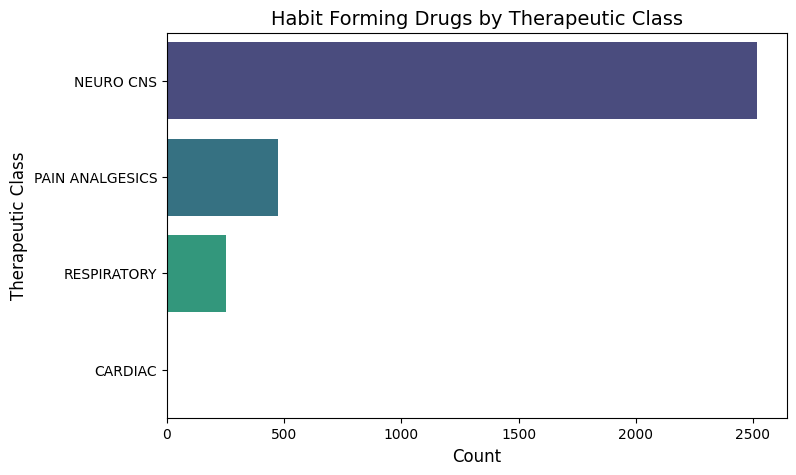

C:\Users\Ishwari Kadam\AppData\Local\Temp\ipykernel_17396\1176487290.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chemical_class_counts.values, y=chemical_class_counts.index, palette='viridis')


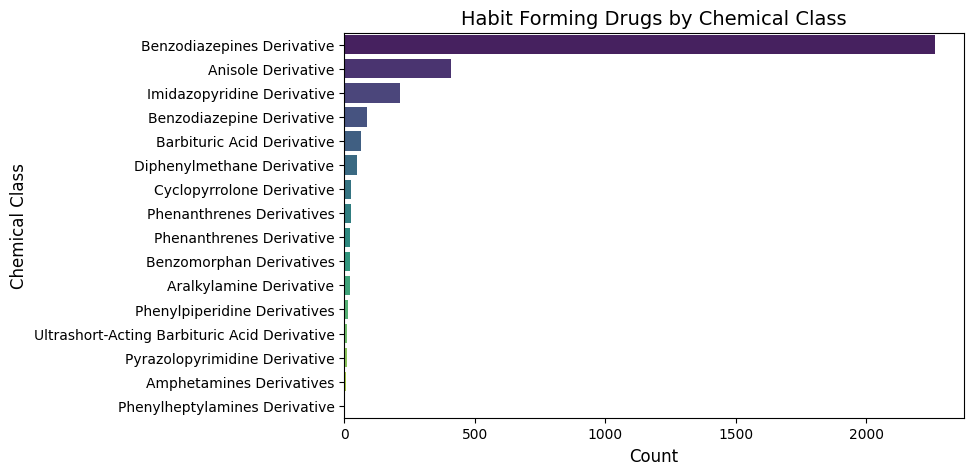

C:\Users\Ishwari Kadam\AppData\Local\Temp\ipykernel_17396\1176487290.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_class_counts.values, y=action_class_counts.index, palette='viridis')


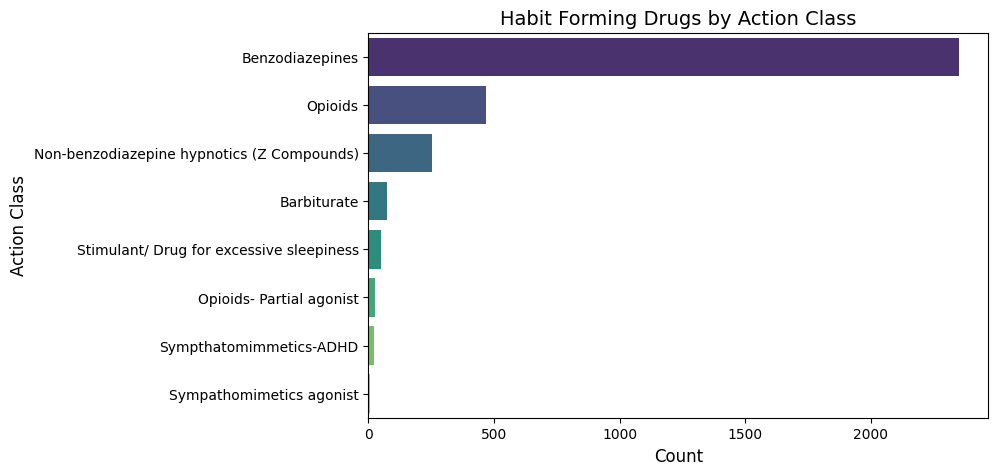

In [44]:
# Filter rows where "Habit Forming" is Yes
habit_forming_yes = df[df['Habit Forming'] == 'Yes']

# Group by Therapeutic Class
therapeutic_class_counts = habit_forming_yes['Therapeutic Class'].value_counts()
print("Therapeutic Class with most habit-forming drugs:\n")
print(therapeutic_class_counts)

# Group by Chemical Class
chemical_class_counts = habit_forming_yes['Chemical Class'].value_counts()
print("\nChemical Class with most habit-forming drugs:\n")
print(chemical_class_counts)

# Group by Action Class
action_class_counts = habit_forming_yes['Action Class'].value_counts()
print("\nAction Class with most habit-forming drugs:\n")
print(action_class_counts)


# Plot for Therapeutic Class
plt.figure(figsize=(8, 5))
sns.barplot(x=therapeutic_class_counts.values, y=therapeutic_class_counts.index, palette='viridis')
plt.title("Habit Forming Drugs by Therapeutic Class", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Therapeutic Class", fontsize=12)
plt.show()

# Plot for Chemical Class
plt.figure(figsize=(8, 5))
sns.barplot(x=chemical_class_counts.values, y=chemical_class_counts.index, palette='viridis')
plt.title("Habit Forming Drugs by Chemical Class", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Chemical Class", fontsize=12)
plt.show()

# Plot for Action Class
plt.figure(figsize=(8, 5))
sns.barplot(x=action_class_counts.values, y=action_class_counts.index, palette='viridis')
plt.title("Habit Forming Drugs by Action Class", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Action Class", fontsize=12)
plt.show()


In [45]:
# Combine all three to analyze together
combined_counts = habit_forming_yes.groupby(['Therapeutic Class', 'Chemical Class', 'Action Class']).size()
combined_counts_sorted = combined_counts.sort_values(ascending=False)
print("\nCombination of Therapeutic Class, Chemical Class, and Action Class with most habit-forming drugs:\n")
print(combined_counts_sorted.head(10))  # Top 10 combinations


Combination of Therapeutic Class, Chemical Class, and Action Class with most habit-forming drugs:

Therapeutic Class  Chemical Class              Action Class                              
NEURO CNS          Benzodiazepines Derivative  Benzodiazepines                               2015
PAIN ANALGESICS    Anisole Derivative          Opioids                                        411
RESPIRATORY        Benzodiazepines Derivative  Benzodiazepines                                247
NEURO CNS          Imidazopyridine Derivative  Non-benzodiazepine hypnotics (Z Compounds)     214
                   Benzodiazepine Derivative   Benzodiazepines                                 88
                   Barbituric Acid Derivative  Barbiturate                                     64
                   Diphenylmethane Derivative  Stimulant/ Drug for excessive sleepiness        50
                   Cyclopyrrolone Derivative   Non-benzodiazepine hypnotics (Z Compounds)      28
                   Phenant

C:\Users\Ishwari Kadam\AppData\Local\Temp\ipykernel_17396\450460391.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


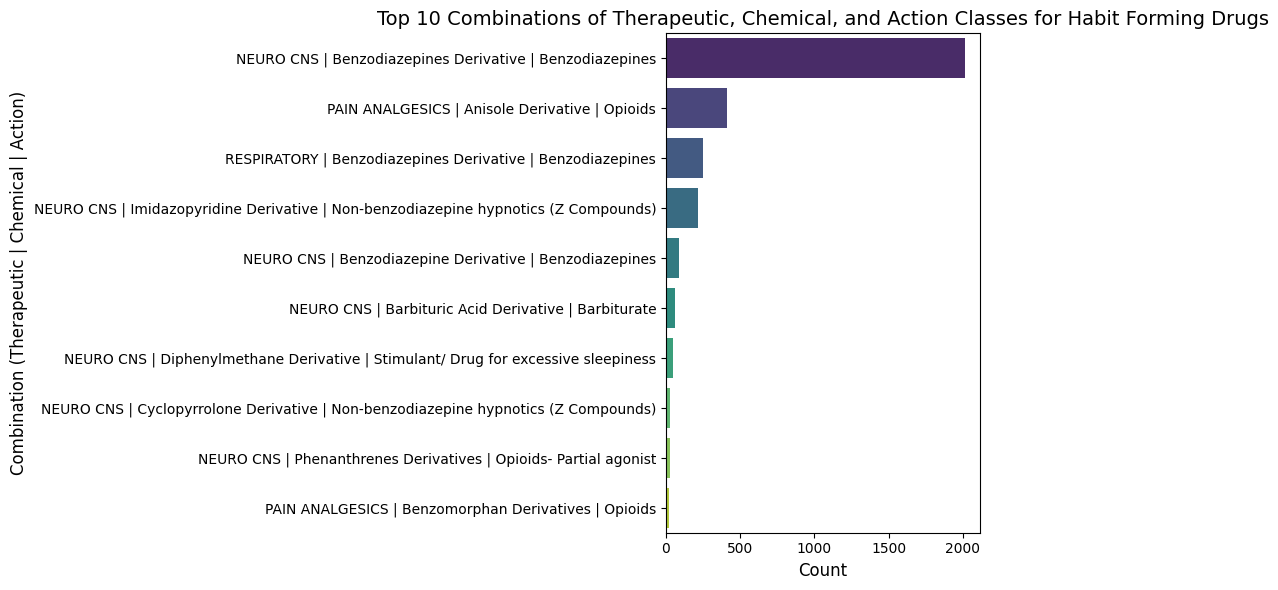

In [46]:
# Extract the top 10 combinations
top_combinations = combined_counts_sorted.head(10).reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Count', 
    y=top_combinations.apply(lambda x: f"{x['Therapeutic Class']} | {x['Chemical Class']} | {x['Action Class']}", axis=1), 
    data=top_combinations, 
    palette="viridis"
)
plt.title("Top 10 Combinations of Therapeutic, Chemical, and Action Classes for Habit Forming Drugs", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Combination (Therapeutic | Chemical | Action)", fontsize=12)
plt.tight_layout()
plt.show()


In [77]:
# Filter the dataset for rows matching the top 10 combinations
top_combination_rows = habit_forming_yes.merge(
    top_combinations[['Therapeutic Class', 'Chemical Class', 'Action Class']], 
    on=['Therapeutic Class', 'Chemical Class', 'Action Class']
)

# Get unique treatments for each combination
top_combination_treatments = top_combination_rows.groupby(['Therapeutic Class', 'Chemical Class', 'Action Class'])['Treatment'].unique()

# Display the treatments for each combination
for idx, treatments in top_combination_treatments.items():
    print(f"Combination: {idx}")
    print("Treatments:")
    print(", ".join(treatments))
    print("-" * 50)


Combination: ('NEURO CNS', 'Barbituric Acid Derivative', 'Barbiturate')
Treatments:
 Epilepsy/Seizures
--------------------------------------------------
Combination: ('NEURO CNS', 'Benzodiazepine Derivative', 'Benzodiazepines')
Treatments:
 Short term anxiety, Treatment of Short term anxiety,  Epilepsy/Seizures
--------------------------------------------------
Combination: ('NEURO CNS', 'Benzodiazepines Derivative', 'Benzodiazepines')
Treatments:
Treatment of Anxiety, Treatment of Anxiety disorder,  Short term anxiety,  Severe anxiety, Treatment of Epilepsy/Seizures, Treatment of Insomnia,  Conscious sedation during diagnostic or therapeutic procedures,  Insomnia, Treatment of Depression, Treatment of Status epilepticus
--------------------------------------------------
Combination: ('NEURO CNS', 'Cyclopyrrolone Derivative', 'Non-benzodiazepine hypnotics (Z Compounds)')
Treatments:
 Insomnia, Treatment of Insomnia
--------------------------------------------------
Combination: ('NEUR

This code will output each top combination along with the list of medicines that fall under it. This helps identify the specific medicines associated with the most habit-forming combinations

In [54]:
# Filter the dataset for rows matching the top 10 combinations
filtered_data = habit_forming_yes.merge(
    top_combinations, 
    on=['Therapeutic Class', 'Chemical Class', 'Action Class']
)

# Group by the combination and aggregate medicine names
combination_medicines = filtered_data.groupby(
    ['Therapeutic Class', 'Chemical Class', 'Action Class']
)['name'].apply(lambda x: list(x.unique())).reset_index()

# Add a column for the count of medicines
combination_medicines['Medicine Count'] = combination_medicines['name'].apply(len)

# Rename columns for clarity
combination_medicines.columns = ['Therapeutic Class', 'Chemical Class', 'Action Class', 'Medicines', 'Medicine Count']

# Display the combinations with corresponding medicine names and counts
print("\nMedicines for Top Habit-Forming Combinations with Counts:\n")
for index, row in combination_medicines.iterrows():
    print(f"Combination: Therapeutic Class = {row['Therapeutic Class']}, "
          f"Chemical Class = {row['Chemical Class']}, "
          f"Action Class = {row['Action Class']}")
    print(f"Medicine Count: {row['Medicine Count']}")
    print(f"Medicines: {', '.join(row['Medicines'])}")
    print()



Medicines for Top Habit-Forming Combinations with Counts:

Combination: Therapeutic Class = NEURO CNS, Chemical Class = Barbituric Acid Derivative, Action Class = Barbiturate
Medicine Count: 55
Medicines: barbee 25mg tablet, barbee 50mg tablet, barbinal 60mg tablet, beetal 3mg tablet, barbinal 30mg tablet, barbinol 200mg injection, borphen 60mg tablet, barbinol 100mg injection, barbinol 60mg tablet, borphen 30mg tablet, barbinol 30mg tablet, etdone 25mg tablet, epiad 25mg tablet, etdone 50mg tablet, epiad 50mg tablet, epiad 12.5mg tablet, epitan 60mg tablet, etdone 100 tablet, epikon 30mg tablet, epitan 30mg tablet, epikon 60mg tablet, emgard 60mg tablet, emgard 30mg tablet, emgard 15mg tablet, fenobarb 200mg injection, feni 100mg tablet, gardenal 60 tablet, gardenal 30 tablet, gardenal 20mg/5ml syrup, luminal 30mg tablet, mysoline 250 tablet, nytoin tablet, opitone 30 tablet, opitone 60 tablet, prolet 25 tablet, phenobarbitone 200mg injection, prolet 50 tablet, prolet 12.5 tablet, ph

In [55]:
# Identify substitutes for the top combinations without repetition
substitute_columns = ['substitute0', 'substitute1', 'substitute2', 'substitute3', 'substitute4']

# Extract medicines from the top combinations
top_combination_medicines = filtered_data['name'].unique()

# Filter the dataset for these medicines and collect their substitutes
substitute_data = df[df['name'].isin(top_combination_medicines)]

# Melt the substitutes columns to a single column
substitutes_melted = substitute_data.melt(
    id_vars=['name'], 
    value_vars=substitute_columns, 
    var_name='Substitute Type', 
    value_name='Substitute'
)

# Remove duplicates and drop NaN substitutes
unique_substitutes = substitutes_melted.drop_duplicates(subset=['name', 'Substitute']).dropna(subset=['Substitute'])

# Group by medicine to display substitutes
medicine_substitutes = unique_substitutes.groupby('name')['Substitute'].apply(list).reset_index()

# Display medicines with their unique substitutes
print("\nMedicines and their Unique Substitutes:\n")
for index, row in medicine_substitutes.iterrows():
    print(f"Medicine: {row['name']}")
    print(f"Substitutes: {', '.join(row['Substitute'])}")
    print()



Medicines and their Unique Substitutes:

Medicine: aaram 0.5mg tablet
Substitutes: Alprasafe 0.5mg Tablet, Alparazole 0.5mg Tablet, Alprazol 0.5mg Tablet, Texidep 0.5mg Tablet, Zolipax 0.5mg Tablet

Medicine: aaram tablet
Substitutes: Alltop 0.25mg Tablet, Alprasafe 0.25mg Tablet, Nindra 0.25mg Tablet, Alora 0.25mg Tablet, Exal 0.25mg Tablet

Medicine: abidol 100mg injection
Substitutes: Bestodol 100 Injection, Tricare Injection, Tramot 100mg Injection, Supridol 100mg Injection, Tramazac Injection

Medicine: abizolam 0.5mg tablet
Substitutes: Alprasafe 0.5mg Tablet, Alparazole 0.5mg Tablet, Alprazol 0.5mg Tablet, Texidep 0.5mg Tablet, Zolipax 0.5mg Tablet

Medicine: acema 50mg injection
Substitutes: Tramore Injection, Tramacad 50mg Injection, Tranzex 50mg Injection, Contramal 50 Injection, Tramazac HP 50mg Injection

Medicine: achidol 100mg injection
Substitutes: Bestodol 100 Injection, Tricare Injection, Tramot 100mg Injection, Supridol 100mg Injection, Tramazac Injection

Medicine: 


Top Side Effects for Habit-Forming Medicines (Percentage):

Side Effect
Dizziness                70.177839
Drowsiness               60.294118
Depression               33.823529
Fatigue                  32.079343
Impaired coordination    31.190150
Sleepiness               30.745554
Nausea                   25.991792
Lightheadedness          24.623803
Constipation             20.759234
Vomiting                 15.047880
Name: count, dtype: float64


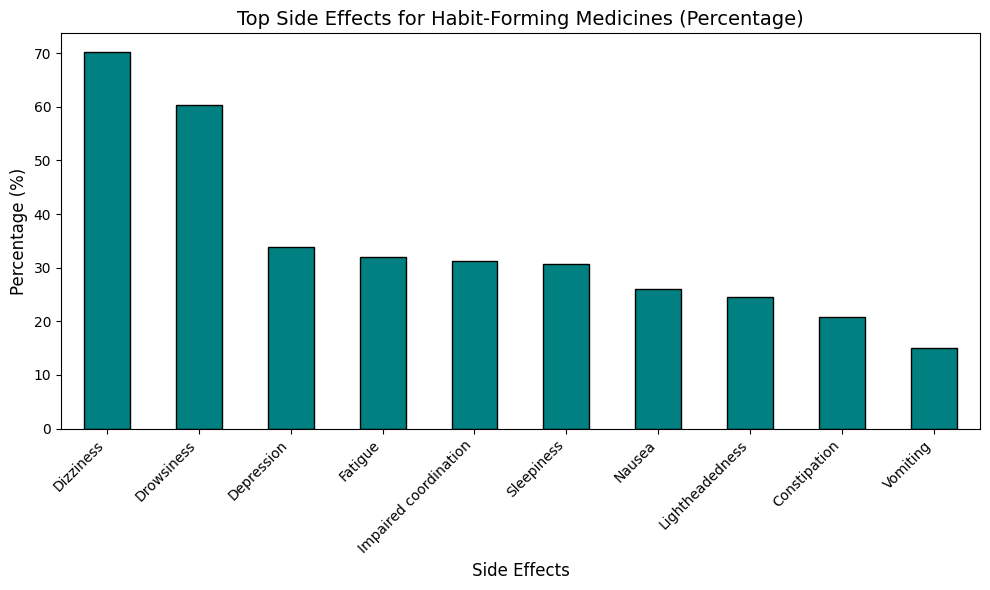

In [65]:
# Filter the dataset for habit-forming medicines
habit_forming_side_effects = df[df['Habit Forming'] == "Yes"]

# Side effect columns to analyze
side_effect_columns = ['sideEffect0', 'sideEffect1', 'sideEffect2', 'sideEffect3', 'sideEffect4']

# Melt the side effects into a single column
side_effects_melted = habit_forming_side_effects.melt(
    id_vars=['name'], 
    value_vars=side_effect_columns, 
    var_name='Side Effect Type', 
    value_name='Side Effect'
)

# Remove NaN values and duplicates (ensuring unique medicine-side effect combinations)
side_effects_cleaned = side_effects_melted.dropna(subset=['Side Effect']).drop_duplicates(subset=['name', 'Side Effect'])

# Count the frequency of each unique side effect
side_effect_counts = side_effects_cleaned['Side Effect'].value_counts()

# Convert counts to percentages
total_habit_forming_medicines = habit_forming_side_effects['name'].nunique()
side_effect_percentages = (side_effect_counts / total_habit_forming_medicines) * 100

# Display the top side effects as percentages
print("\nTop Side Effects for Habit-Forming Medicines (Percentage):\n")
print(side_effect_percentages.head(10))

# Plot the top side effects as percentages
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
side_effect_percentages.head(10).plot(kind='bar', color='teal', edgecolor='black')
plt.title("Top Side Effects for Habit-Forming Medicines (Percentage)", fontsize=14)
plt.xlabel("Side Effects", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Conclusion - The analysis highlights that medications used for the treatment of anxiety and insomnia are among the most habit-forming. Specifically, the combination of Therapeutic Class: NEURO CNS, Chemical Class: Benzodiazepines Derivative, and Action Class: Benzodiazepines stands out as the most significant, with 1,792 medications categorized under it.

Furthermore, the side effects associated with these habit-forming medications are predominantly dizziness and drowsiness, which occur in a majority of cases. Additional side effects include depression and fatigue, making these medications not only habit-forming but also impactful in terms of patient well-being and daily functionality.

This insight underscores the need for cautious prescription practices and patient monitoring, especially when dealing with treatments involving benzodiazepines or similar drug classes